In [8]:
from pyrouge import Rouge155
from __future__ import print_function
%matplotlib inline

import matplotlib.pyplot as plt
import nltk
nltk.sent_tokenizer=nltk.data.load('tokenizers/punkt/portuguese.pickle')


#função para extrair apenas principais métricas do rouge
def remove_extra_info_from_rouge(d):
    saida ={}
    for key, value in d.iteritems():
        if ("_cb" not in key) and ("_ce" not in key):
            saida[key]=value
    return saida

from __future__ import print_function
import sys

#como usar o rouge
ref_texts = { 'A': open('experimentos/01/C1_original.txt', 'r').read().decode('utf-8') }
summary_text = open('experimentos/01/C1_extrato_humano.txt', 'r').read().decode('utf-8')
      
# summary_text = { 'A': open('experimentos/01/C1_extrato_humano.txt', 'r').read().decode('utf-8'),
#                  'B': open('experimentos/01/C1_extrato_wives.txt', 'r').read().decode('utf-8'),
#                  'C': open('experimentos/01/C1_sumario_automatico_CSTSumm.txt', 'r').read() }


rouge = Rouge155(rouge_home='/home/ana/anaconda2/lib/python2.7/site-packages/pyrouge/ROUGE-1.5.5', n_words=100)
score = rouge.score_summary(summary_text, ref_texts)
print(remove_extra_info_from_rouge(score))

{'rouge_su4_precision': 0.82299, 'rouge_1_precision': 0.90426, 'rouge_4_recall': 0.70652, 'rouge_1_f_score': 0.89947, 'rouge_su4_f_score': 0.81851, 'rouge_3_recall': 0.74194, 'rouge_4_precision': 0.71429, 'rouge_4_f_score': 0.71038, 'rouge_2_recall': 0.78723, 'rouge_3_f_score': 0.74595, 'rouge_3_precision': 0.75, 'rouge_2_precision': 0.7957, 'rouge_2_f_score': 0.79144, 'rouge_1_recall': 0.89474, 'rouge_su4_recall': 0.81408}


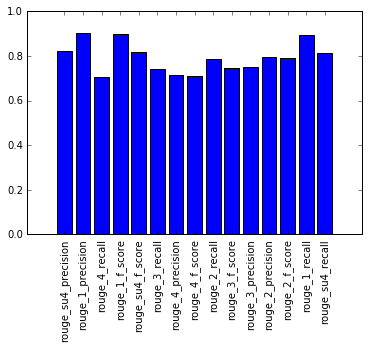

In [9]:
import matplotlib.pyplot as plt

D = remove_extra_info_from_rouge(score)

plt.bar(range(len(D)), D.values(), align='center')
locs, label = plt.xticks(range(len(D)), D.keys())
plt.setp(label, rotation=90)

plt.show()

In [10]:
#como usar o rouge
ref_texts = { 'A': open('experimentos/01/C1_original.txt', 'r').read().decode('utf-8') }
summary_text = open('experimentos/01/C1_sumario_automatico_CSTSumm.txt', 'r').read().decode('utf-8')

rouge = Rouge155(rouge_home='/home/ana/anaconda2/lib/python2.7/site-packages/pyrouge/ROUGE-1.5.5', n_words=100)
score = rouge.score_summary(summary_text, ref_texts)
print(remove_extra_info_from_rouge(score))

{'rouge_su4_precision': 0.59124, 'rouge_1_precision': 0.78723, 'rouge_4_recall': 0.0, 'rouge_1_f_score': 0.78307, 'rouge_su4_f_score': 0.58802, 'rouge_3_recall': 0.06452, 'rouge_4_precision': 0.0, 'rouge_4_f_score': 0.0, 'rouge_2_recall': 0.37234, 'rouge_3_f_score': 0.06487, 'rouge_3_precision': 0.06522, 'rouge_2_precision': 0.37634, 'rouge_2_f_score': 0.37433, 'rouge_1_recall': 0.77895, 'rouge_su4_recall': 0.58484}


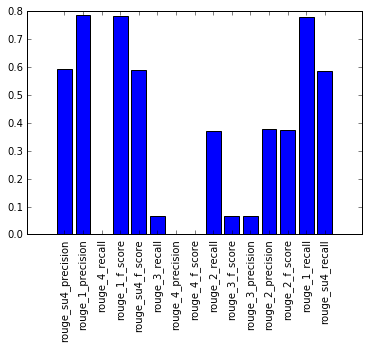

In [11]:
import matplotlib.pyplot as plt

D = remove_extra_info_from_rouge(score)

plt.bar(range(len(D)), D.values(), align='center')
locs, label = plt.xticks(range(len(D)), D.keys())
plt.setp(label, rotation=90)

plt.show()

{'rouge_su4_precision': 0.58856, 'rouge_1_precision': 0.78495, 'rouge_4_recall': 0.03261, 'rouge_1_f_score': 0.7766, 'rouge_su4_f_score': 0.58212, 'rouge_3_recall': 0.08602, 'rouge_4_precision': 0.03333, 'rouge_4_f_score': 0.03297, 'rouge_2_recall': 0.38298, 'rouge_3_f_score': 0.08695, 'rouge_3_precision': 0.08791, 'rouge_2_precision': 0.3913, 'rouge_2_f_score': 0.3871, 'rouge_1_recall': 0.76842, 'rouge_su4_recall': 0.57581}


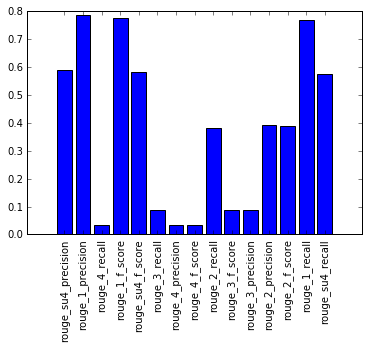

In [12]:
#como usar o rouge
ref_texts = { 'A': open('experimentos/01/C1_original.txt', 'r').read().decode('utf-8') }
summary_text = open('experimentos/01/C1_extrato_wives.txt', 'r').read().decode('utf-8')
      
rouge = Rouge155(rouge_home='/home/ana/anaconda2/lib/python2.7/site-packages/pyrouge/ROUGE-1.5.5', n_words=100)
score = rouge.score_summary(summary_text, ref_texts)
print(remove_extra_info_from_rouge(score))

import matplotlib.pyplot as plt

D = remove_extra_info_from_rouge(score)

plt.bar(range(len(D)), D.values(), align='center')
locs, label = plt.xticks(range(len(D)), D.keys())
plt.setp(label, rotation=90)

plt.show()